In [216]:
from fastapi import Request, FastAPI, Response
from typing import Any, Dict, AnyStr, List
from datetime import datetime
from bson import json_util
import numpy as np
import pandas as pd
import requests
import json

In [23]:
header={'Content-Type': 'application/json',
      'api-key': 'api-key_bb93997d9f18e0d4cf8117d4'}

In [301]:
url = 'http://127.0.0.1:8000/analyse/data_analyse'
doc =  requests.get(url)
doc = doc.json()

In [302]:
print(doc)

[{'_id': '6598d091733511a437f20641', 'identifier': 5893643, 'heartbeat': 104, 'X': 123, 'Y': 82, 'Z': 567, 'date': '2023-12-11', 'time': '11:54:35'}, {'_id': '6598d091733511a437f20641', 'identifier': 5893643, 'heartbeat': 167, 'X': 154, 'Y': 79, 'Z': 81, 'date': '2023-11-29', 'time': '20:56:35'}, {'_id': '6599472ba471deb267152110', 'identifier': 5893643, 'heartbeat': 104, 'X': 123, 'Y': 82, 'Z': 567, 'date': '2023-12-11', 'time': '11:54:35'}, {'_id': '6599472ba471deb267152110', 'identifier': 5893643, 'heartbeat': 167, 'X': 154, 'Y': 79, 'Z': 81, 'date': '2023-11-29', 'time': '20:56:35'}, {'_id': '65994767a471deb267152111', 'identifier': 5893643, 'heartbeat': 104, 'X': 145, 'Y': 87, 'Z': 90, 'date': '2023-12-11', 'time': '11:54:35'}, {'_id': '65994767a471deb267152111', 'identifier': 5893643, 'heartbeat': 161, 'X': 14, 'Y': 29, 'Z': 80, 'date': '2023-11-29', 'time': '20:56:35'}, {'_id': '65994767a471deb267152111', 'identifier': 5893643, 'heartbeat': 185, 'X': 155, 'Y': 90, 'Z': 75, 'date

In [303]:
data_f = json_util.dumps(doc) 
data = pd.read_json(data_f)

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/2462899896.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(data_f)


In [304]:
data.head(10)

,_id,identifier,heartbeat,X,Y,Z,date,time
0,6598d091733511a437f20641,5893643,104,123,82,567,2023-12-11,11:54:35
1,6598d091733511a437f20641,5893643,167,154,79,81,2023-11-29,20:56:35
2,6599472ba471deb267152110,5893643,104,123,82,567,2023-12-11,11:54:35
3,6599472ba471deb267152110,5893643,167,154,79,81,2023-11-29,20:56:35
4,65994767a471deb267152111,5893643,104,145,87,90,2023-12-11,11:54:35
5,65994767a471deb267152111,5893643,161,14,29,80,2023-11-29,20:56:35
6,65994767a471deb267152111,5893643,185,155,90,75,2023-11-29,20:56:35
7,659ea460584bf7dd7cf2da5a,5893643,109,144,81,91,2023-12-11,11:54:35
8,659ea460584bf7dd7cf2da5a,5893643,160,143,292,88,2023-11-29,20:56:35
9,659ea460584bf7dd7cf2da5a,5893643,184,16,99,70,2023-11-29,20:56:35


In [86]:
#Tratamento dos dados 

In [305]:
data.drop(["_id"], axis=1, inplace=True)

In [306]:
data.head()

,identifier,heartbeat,X,Y,Z,date,time
0,5893643,104,123,82,567,2023-12-11,11:54:35
1,5893643,167,154,79,81,2023-11-29,20:56:35
2,5893643,104,123,82,567,2023-12-11,11:54:35
3,5893643,167,154,79,81,2023-11-29,20:56:35
4,5893643,104,145,87,90,2023-12-11,11:54:35


In [307]:
data.isnull().sum()

identifier    0
heartbeat     0
X             0
Y             0
Z             0
date          0
time          0
dtype: int64

In [308]:
#Observação dos dados

In [309]:
data.shape

(23, 7)

In [310]:
occ = data['heartbeat'].value_counts()
occ

heartbeat
109    4
160    4
184    4
104    3
167    2
161    1
185    1
88     1
70     1
98     1
95     1
Name: count, dtype: int64

In [311]:
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [312]:
data.columns

Index(['identifier', 'heartbeat', 'X', 'Y', 'Z', 'date', 'time'], dtype='object')

In [313]:
data.drop(["time", "date"], axis=1, inplace=True)

In [314]:
data.head()

,identifier,heartbeat,X,Y,Z
0,5893643,104,123,82,567
1,5893643,167,154,79,81
2,5893643,104,123,82,567
3,5893643,167,154,79,81
4,5893643,104,145,87,90


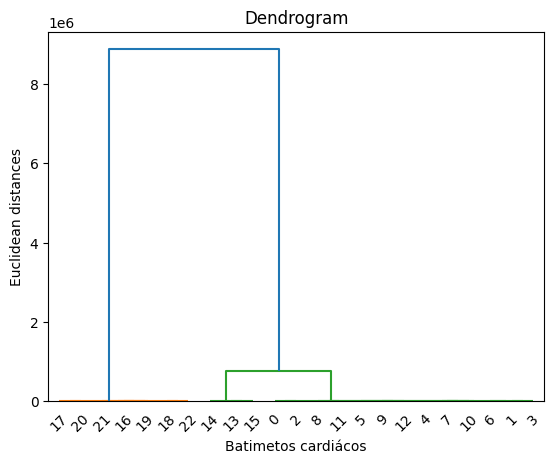

In [315]:
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Batimetos cardiácos')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'sepal length in cm')

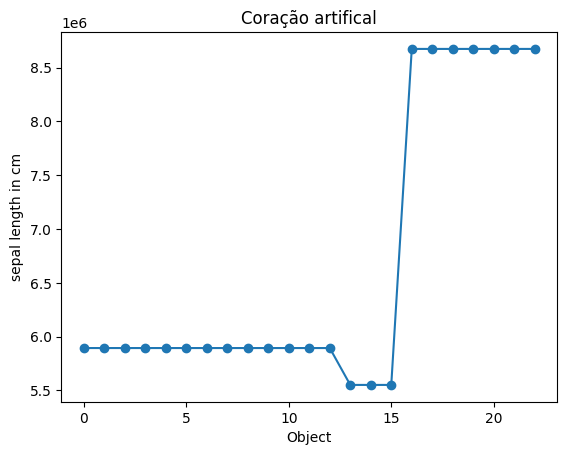

In [316]:
fig, ax = plt.subplots()
ax.plot(data.iloc[: ,0], marker="o")
ax.set_title("Coração artifical")
ax.set_xlabel("Object")
ax.set_ylabel("sepal length in cm")

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/928339366.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.heartbeat[data['heartbeat']==167], color='orange', hist=False, kde=True, label='alto')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/928339366.py:4: UserWarning: 

`distplot` is a deprecated function and w

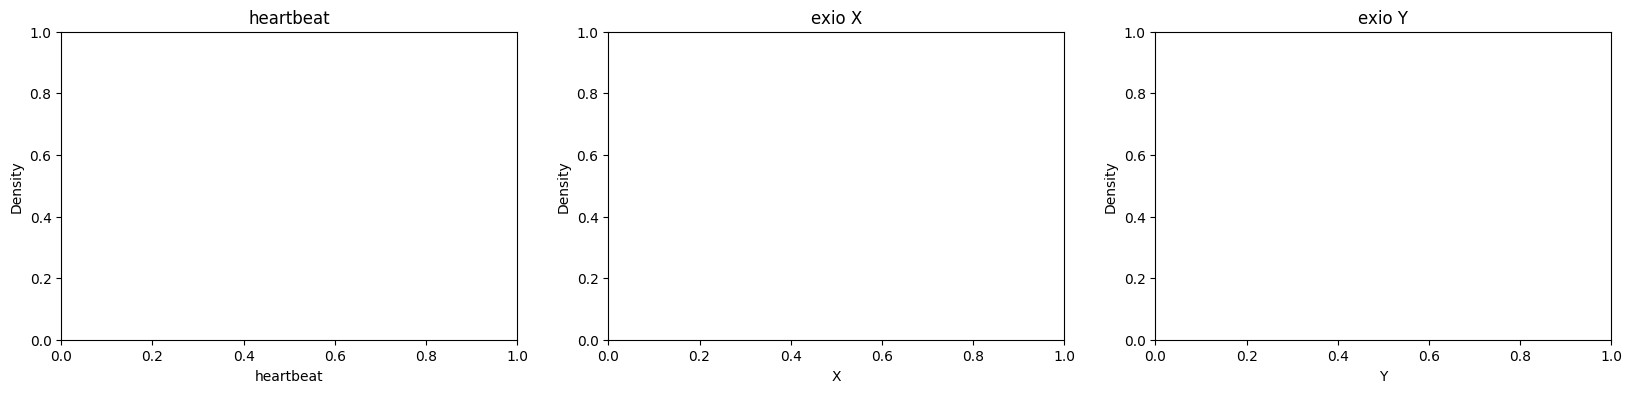

In [317]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(data.heartbeat[data['heartbeat']==167], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.heartbeat[data['heartbeat']==109], color='blue', hist=False, kde=True, label='baixo')
plt.title('heartbeat')

plt.subplot(1,3,2)
sns.distplot(data.X[data['X']==144], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.X[data['X']==16], color='blue', hist=False, kde=True, label='baixo')
plt.title('exio X')

plt.subplot(1,3,3)
sns.distplot(data.Y[data['Y']==82], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.Y[data['Y']==79], color='blue', hist=False, kde=True, label='baixo')
plt.title('exio Y')

#plt.subplot(1,3,3)
#sns.distplot(data.Z[data['Z']==567], color='orange', hist=False, kde=True, label='alto')
#sns.distplot(data.Z[data['Z']==70], color='blue', hist=False, kde=True, label='baixo')
#plt.title('exio Z')

plt.show()

In [ ]:
#Aplicando Matrix de Correlação

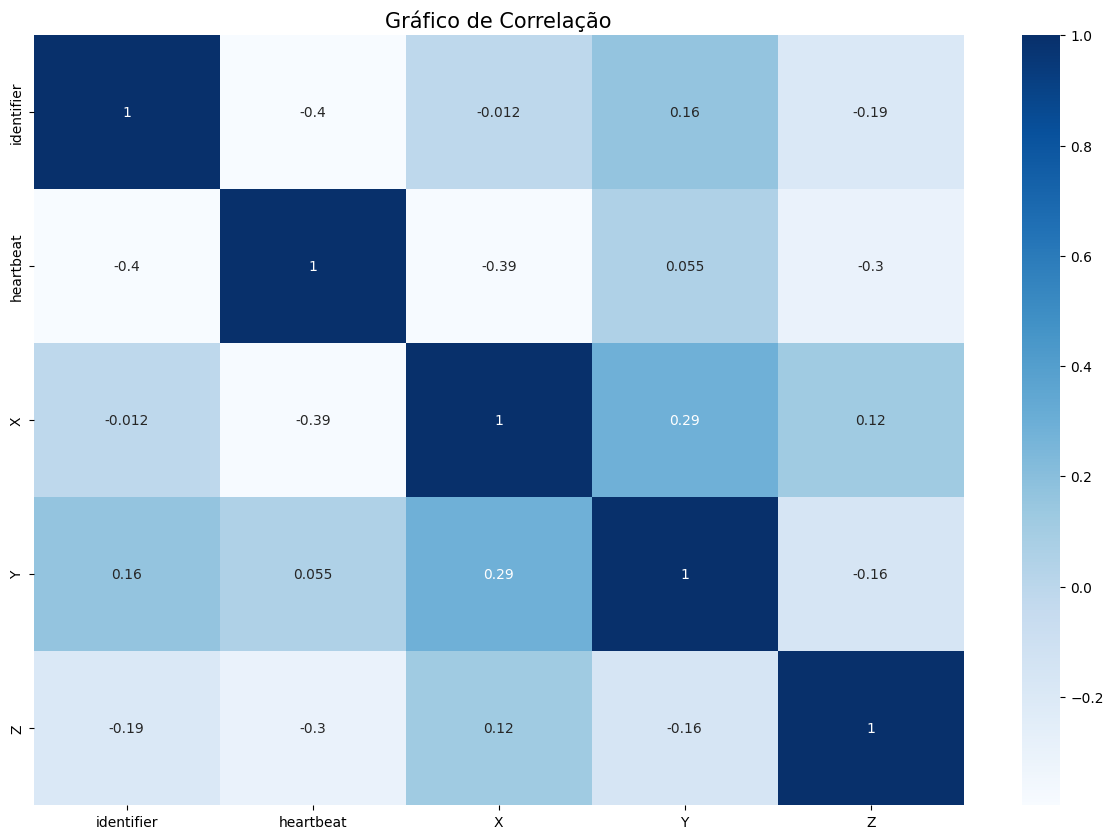

In [294]:
plt.figure(figsize=(15, 10))
corr = sns.heatmap (data.corr(), cmap = 'Blues', annot = True)
corr.set_title('Gráfico de Correlação', fontsize = 15)
plt.show()

In [ ]:
#Treinar 

In [291]:
X = data
y = data['heartbeat']
target = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

lr = LinearRegression()
tr = lr.fit(X_train, y_train)

In [ ]:
#Arvor de decisão

In [292]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9444444444444444

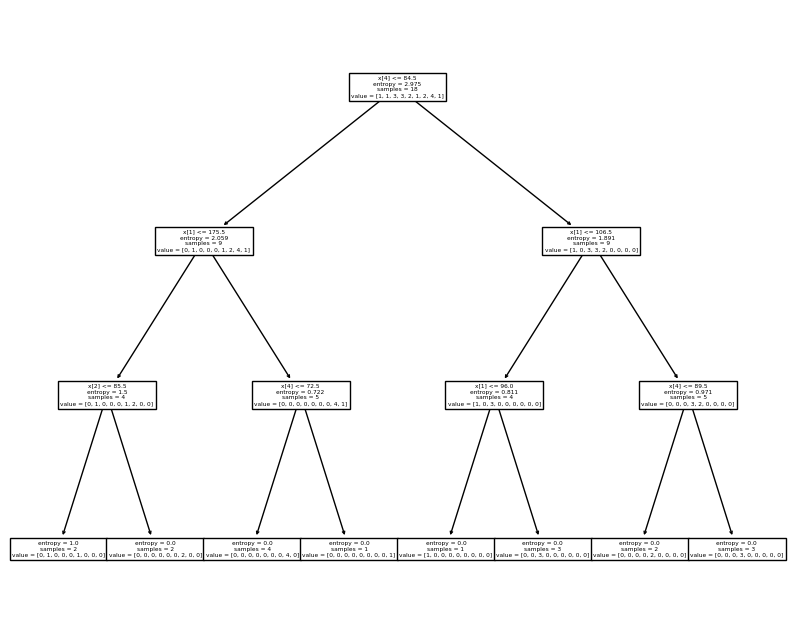

In [293]:
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(clf)
plt.show()